Yog Chaudhary

11727095

ADTA 5550: Deep Learning with Big Data Week 3 Assignment

Professor: Dr. Hamidreza Moradi

University of North Texas

# PART I: One-Hot Encoding (20 Points)

In [1]:
import pandas as pd
import numpy as np
import csv

# Import Libraries & modules for data visualization

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import scit-Learn module for the algorithm/model: DecisionTreeRegressor

from sklearn. tree import DecisionTreeRegressor

# Import scikit-Learn module to split the dataset into train/ test sub-datasets

from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
# Display the encoded dataset 
data = pd.read_csv ("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# DataFrame Descriptive Statistics for Iris
print(data.describe(include=None))

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [5]:
#DataFrame informatation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Missing Values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
print(data.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [8]:
print(data.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Question 1.4:
Based on the answer to Question 1.2, perform the necessary encoding tasks to transform the class values before using the dataset for the deep learning project.

In [9]:
# Perform integer encoding using LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Display the encoded dataset
#print(df.head())
iris_data = data
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
# Perform one-hot encoding using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
species_onehot = onehot_encoder.fit_transform(iris_data[['Species']]).toarray()

# Create one-hot encoded column names
species_classes = onehot_encoder.categories_[0]
species_columns = ['Species_' + str(species) for species in species_classes]

# Create a new dataframe with one-hot encoded columns
species_data = pd.DataFrame(species_onehot, columns=species_columns)

# Concatenate the original dataframe with the one-hot encoded dataframe
iris_onehot_data = pd.concat([iris_data, species_data], axis=1)

# Display the one-hot encoded dataset
print(iris_onehot_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica  
0                  1.0                      0.0                     0.0  
1                  1.0                      0.0                     0.0  
2                  1.0                      0.0                     0.0  
3                  1.0                      0.0                     0.0  
4                  1.0                      0.0                     0.0  


In [11]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Separate Dataset into & Outputs Arrays

In [12]:
# Store dataframe values into a numpy array
array = data.values

# Separate array into input and oupt put componets by slicing
X = array[:,1:5]

# # For Y (output) [:3] --> All the rows in the last column (MEDV)
Y = array[:,5]

Split into Input/Output Array into Training/Testing Datasets

In [13]:
# Split the dataset --> training sub-dataset:  67%, and test sub-dataset:  33%

test_size = 0.33

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization

seed = 7

# Split the dataset (both input & output) into training/testing datasets

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

In [14]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Encode class values as integers
encoder_train = LabelEncoder()
encoder_train.fit(Y_train)
encoded_Y_train = encoder_train.transform(Y_train)

# Convert integers to one-hot encoding format
onehot_Y_train = to_categorical(encoded_Y_train)

# For the test set, use the same encoder instance
# encode class Values as Intergers
encoder_test = LabelEncoder()
encoder_test.fit(Y_test)
encoded_Y_test = encoder_test.transform(Y_test)
encoded_Y_test = encoder_test.transform(Y_test)

# Convert integers to one-hot encoding format for the test set
onehot_Y_test = to_categorical(encoded_Y_test)


Using TensorFlow backend.


The number encoding is insufficient for classifying factors without this ordinal connection. In
example, allowing the model to anticipate a feature being requested across categories and
then encoding it might result in subpar presentation or unexpected results (forecasts
somewhere between classes). To encode the full number representation in this case, a onehot
encoding can be used. It is possible to modify the class values before using the dataset
by looking at the screen shot up top.

# PART II: MLPs (Fully Connected Neural Networks) with Keras (50 Points)

In [15]:
# Perform integer encoding for the 'species' column
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# Perform integer encoding for the 'species' column
label_encoder = LabelEncoder()
iris_data['species_encoded'] = label_encoder.fit_transform(iris_data['Species'])

# Split the dataset into features and target
X = iris_data.drop(['Species', 'species_encoded'], axis=1)
y = iris_data['species_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, alpha=0.01, random_state=42)
mlp.fit(X_train, y_train)


# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
# Calculate normalized accuracy score
normalized_accuracy = accuracy_score(y_test, y_pred, normalize=True)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Normalized Accuracy: {:.2f}%".format(normalized_accuracy * 100))


Accuracy: 91.67%
Normalized Accuracy: 91.67%


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


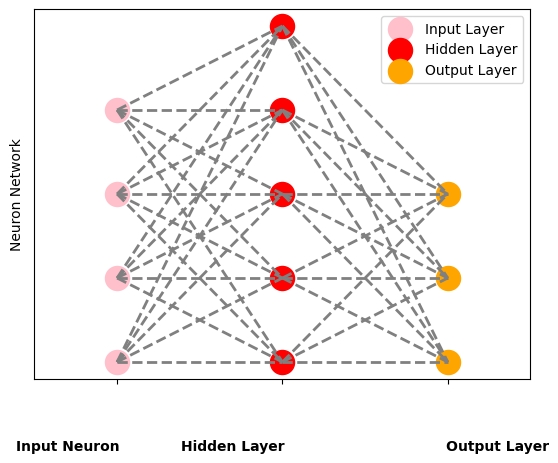

In [16]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import numpy as np

# Define the MLP classifier architecture
hidden_layer_sizes = (5,)  # Number of hidden units in the hidden layer
input_dim = 4 # Number of input features
output_dim = len(label_encoder.classes_)  # Number of output classes

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the input layer
ax.scatter(np.zeros(input_dim), np.arange(input_dim), color='pink', label='Input Layer', s=300)
# Plot the hidden layer
ax.scatter(np.ones(hidden_layer_sizes[0]) * 1, np.arange(hidden_layer_sizes[0]), color='red', label='Hidden Layer', s=300)
# Plot the output layer
ax.scatter(np.ones(output_dim) * 2, np.arange(output_dim), color='orange', label='Output Layer', s=300)

# Connect the input layer to the hidden layer
for i in range(input_dim):
    for j in range(hidden_layer_sizes[0]):
        ax.plot([0, 1], [i, j], color='gray', linewidth=2, linestyle='dashed')

# Connect the hidden layer to the output layer
for i in range(hidden_layer_sizes[0]):
    for j in range(output_dim):
        ax.plot([1, 2], [i, j], color='gray', linewidth=2, linestyle='dashed')

# Add labels to the layers
ax.text(-0.3, -1, 'Input Neuron', ha='center', va='center', fontweight='bold')
ax.text(0.7, -1, 'Hidden Layer', ha='center', va='center', fontweight='bold')
ax.text(2.3, -1, 'Output Layer', ha='center', va='center', fontweight='bold')

# Set the axis limits and labels
ax.set_xlim(-0.5, 2.5)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['', '', ''])
ax.set_yticks([])
ax.set_ylabel('Neuron Network')

# Add a legend
ax.legend(loc='upper right')

# Show the plot
plt.show()


The image illustrates a simplified representation of a neural network. This network includes an input layer, one hidden layer, and an output layer. The input layer collects the initial data points, which are then passed through the hidden layer. The hidden layer processes the information, detecting patterns and features through its neurons (red circles) interconnected by synapse-like structures (dashed lines). The processed information is relayed to the output layer, culminating in the network's final decision or prediction. Each connection carries a weight that is adjusted during the learning process to improve the network's predictive accuracy.

PART III: Redesign the MLP (30 Points)

In [17]:
# Perform integer encoding for the 'species' column
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# Perform integer encoding for the 'species' column
label_encoder = LabelEncoder()
iris_data['species_encoded'] = label_encoder.fit_transform(iris_data['Species'])

# Split the dataset into features and target
X = iris_data.drop(['Species', 'species_encoded'], axis=1)
y = iris_data['species_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000, alpha=0.01, random_state=42)
mlp.fit(X_train, y_train)


# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
# Calculate normalized accuracy score
normalized_accuracy = accuracy_score(y_test, y_pred, normalize=True)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Normalized Accuracy: {:.2f}%".format(normalized_accuracy * 100))

Accuracy: 66.67%
Normalized Accuracy: 66.67%


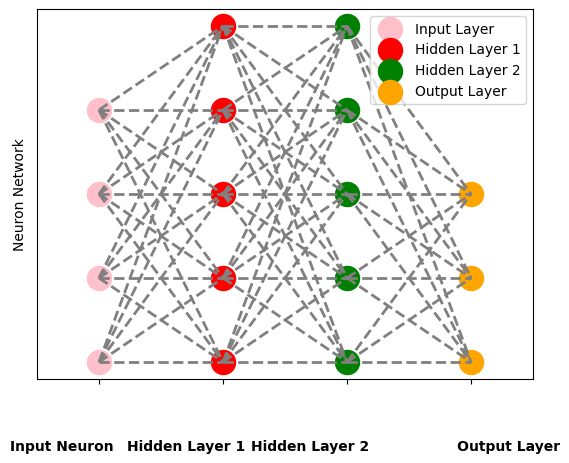

In [18]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import numpy as np

# Define the MLP classifier architecture
hidden_layer_sizes = (5, 5)  # Number of hidden units in the hidden layers
input_dim = 4  # Number of input features
output_dim = len(label_encoder.classes_)  # Number of output classes

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the input layer
ax.scatter(np.zeros(input_dim), np.arange(input_dim), color='pink', label='Input Layer', s=300)

# Plot the first hidden layer
ax.scatter(np.ones(hidden_layer_sizes[0]) * 1, np.arange(hidden_layer_sizes[0]), color='red', label='Hidden Layer 1', s=300)

# Plot the second hidden layer
ax.scatter(np.ones(hidden_layer_sizes[1]) * 2, np.arange(hidden_layer_sizes[1]), color='green', label='Hidden Layer 2', s=300)

# Plot the output layer
ax.scatter(np.ones(output_dim) * 3, np.arange(output_dim), color='orange', label='Output Layer', s=300)

# Connect the input layer to the first hidden layer
for i in range(input_dim):
    for j in range(hidden_layer_sizes[0]):
        ax.plot([0, 1], [i, j], color='gray', linewidth=2, linestyle='dashed')

# Connect the first hidden layer to the second hidden layer
for i in range(hidden_layer_sizes[0]):
    for j in range(hidden_layer_sizes[1]):
        ax.plot([1, 2], [i, j], color='gray', linewidth=2, linestyle='dashed')

# Connect the second hidden layer to the output layer
for i in range(hidden_layer_sizes[1]):
    for j in range(output_dim):
        ax.plot([2, 3], [i, j], color='gray', linewidth=2, linestyle='dashed')

# Add labels to the layers
ax.text(-0.3, -1, 'Input Neuron', ha='center', va='center', fontweight='bold')
ax.text(0.7, -1, 'Hidden Layer 1', ha='center', va='center', fontweight='bold')
ax.text(1.7, -1, 'Hidden Layer 2', ha='center', va='center', fontweight='bold')
ax.text(3.3, -1, 'Output Layer', ha='center', va='center', fontweight='bold')

# Set the axis limits and labels
ax.set_xlim(-0.5, 3.5)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['', '', '', ''])
ax.set_yticks([])
ax.set_ylabel('Neuron Network')

# Add a legend
ax.legend(loc='upper right')

# Show the plot
plt.show()


The image depicts a neural network diagram with one input layer, two hidden layers, and an output layer. Each layer consists of neurons (circles) connected by edges (lines), representing the flow of data and the network's architecture. The input layer neurons receive the initial data. This data is processed through weighted connections to the hidden layers, where the model learns complex patterns. The final hidden layer connects to the output layer, which provides the network's prediction. Colors indicate different layers, illustrating the network's structure and the concept of deep learning with multiple processing layers.

In [19]:
from keras.models import Sequential
from keras.layers import Dense

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


In [20]:
# Create the model
model = baseline_model()
# Display the model summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


Train The Model

In [22]:
# Train the Model
#model.fit(X_train, onehot_Y_train, epochs=150, batch_size=10)